In [ ]:
from google.colab import runtime
runtime.unassign()

In [1]:
!nvidia-smi

Sun Nov 19 04:15:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    23W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/MyDrive/23_T3/COMP9444/Assi2/project2'

/content/gdrive/MyDrive/23_T3/COMP9444/Assi2/project2


In [4]:
!ls

archive.zip  arka  arka_new  AudioWAV  Speech-Emotion-Recognition-Model.h5


In [5]:
# %cd '/content/gdrive/MyDrive/23_T3/COMP9444/Assi2/project2/arka/archive'

In [4]:
import os
# Crema = "/content/gdrive/MyDrive/23_T3/COMP9444/Assi2/project2/arka/archive/"
# crema_directory_list = os.listdir(Crema)
# print(crema_directory_list)

def file_search(dirname, ret, audio_file, list_avoid_dir=[]):
    filenames = os.listdir(dirname)

    for filename in filenames:
        full_filename = os.path.join(dirname, filename)
        audio_name = filename

        if os.path.isdir(full_filename) :
            if full_filename.split('/')[-1] in list_avoid_dir:
                continue
            else:
                file_search(full_filename, ret, list_avoid_dir)

        else:
            ret.append( full_filename )
            audio_file.append(audio_name)



In [6]:
list_files = []

##storing only the names of the audio file
audio_file = []
for x in range(24):

    ##converting the iteration to string
    check_iter = str(x)

    if x == 9:
      sess_name = 'Actor_' + str(x+1)
    elif len(check_iter) == 1:
        sess_name = 'Actor_0' + str(x+1)
    else:
        sess_name = 'Actor_' + str(x+1)
    path = '/content/gdrive/MyDrive/23_T3/COMP9444/Assi2/project2/arka/archive/'+ sess_name + '/'
    file_search(path, list_files, audio_file)
    list_files = sorted(list_files)
    print (sess_name + ", #sum files: " + str(len(list_files)))

Actor_01, #sum files: 60
Actor_02, #sum files: 120
Actor_03, #sum files: 180
Actor_04, #sum files: 240
Actor_05, #sum files: 300
Actor_06, #sum files: 360
Actor_07, #sum files: 420
Actor_08, #sum files: 480
Actor_09, #sum files: 540
Actor_10, #sum files: 600
Actor_11, #sum files: 660
Actor_12, #sum files: 720
Actor_13, #sum files: 780
Actor_14, #sum files: 840
Actor_15, #sum files: 900
Actor_16, #sum files: 960
Actor_17, #sum files: 1020
Actor_18, #sum files: 1080
Actor_19, #sum files: 1140
Actor_20, #sum files: 1200
Actor_21, #sum files: 1260
Actor_22, #sum files: 1320
Actor_23, #sum files: 1380
Actor_24, #sum files: 1440


In [ ]:
# 查看当前安装的librosa版本
import librosa
print(librosa.__version__)

# 升级librosa
!pip install --upgrade librosa


In [7]:
import os
import shutil

# 设定你的Google Drive中archive文件夹的路径
archive_path = '/content/gdrive/MyDrive/23_T3/COMP9444/Assi2/project2/arka/archive'

# 设定新的统一文件夹路径
new_directory_path = '/content/gdrive/MyDrive/23_T3/COMP9444/Assi2/project2/arka_new'

# 创建新的文件夹（如果尚不存在）
if not os.path.exists(new_directory_path):
    os.makedirs(new_directory_path)

# 遍历archive文件夹中的每个子文件夹
for subdir in os.listdir(archive_path):
    # 完整的子文件夹路径
    subdir_path = os.path.join(archive_path, subdir)

    # 检查这个路径是否真的是一个文件夹
    if os.path.isdir(subdir_path):
        # 遍历子文件夹中的每个文件
        for file in os.listdir(subdir_path):
            # 获取文件的完整路径
            file_path = os.path.join(subdir_path, file)

            # 确保这是一个文件，而不是文件夹
            if os.path.isfile(file_path):
                # 构建在新文件夹中的文件路径
                dest_path = os.path.join(new_directory_path, os.path.basename(file_path))

                # 检查目标文件是否已存在，如果不存在，复制文件
                if not os.path.exists(dest_path):
                    shutil.copy2(file_path, dest_path)



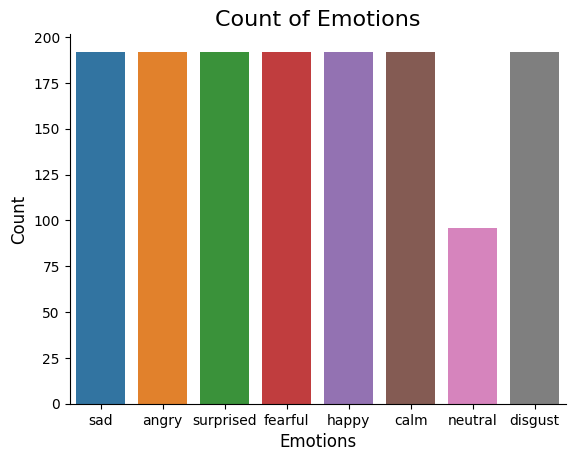

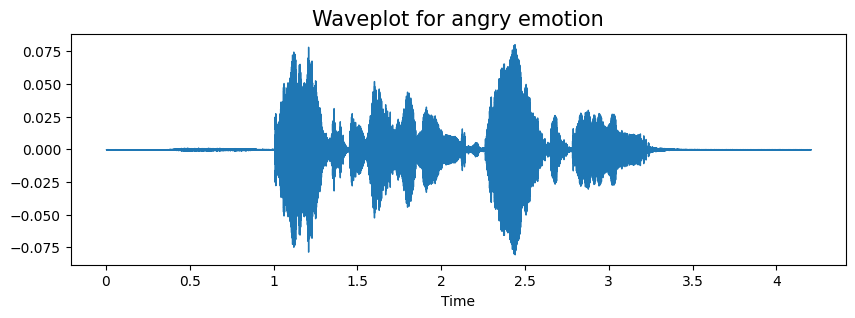

0
500
1000


<ipython-input-17-a5ea4ec4ac03>:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.asarray(data['mfcc'])


(1036, 495, 13) (1036,) (260, 495, 13) (260,) (144, 495, 13) (144,)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, None, 128)         72704     
                                                                 
 lstm_17 (LSTM)              (None, 64)                49408     
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)            (None, 8)                 264       
                                                                 
Total params: 124456 (486.16 KB)
Trainable params: 124456 (486.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/150
33/33 [==============================] - 6s 63ms/step - loss: 2.04

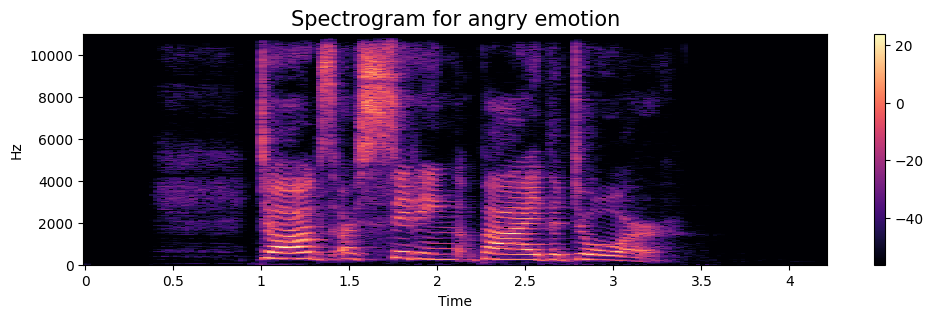

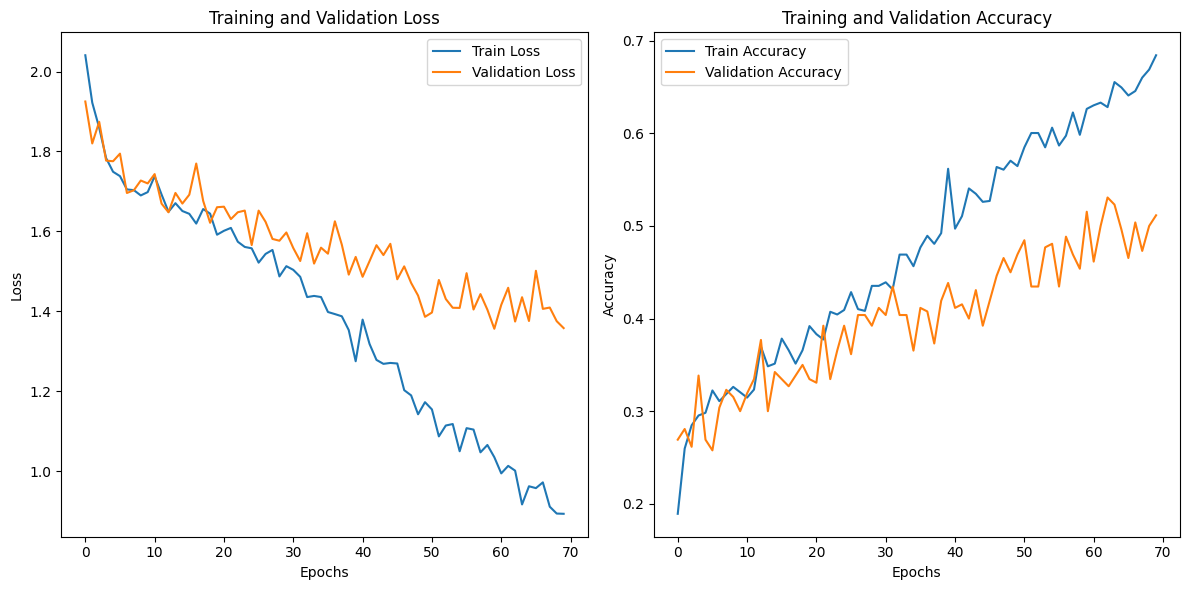

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 1s 21ms/step


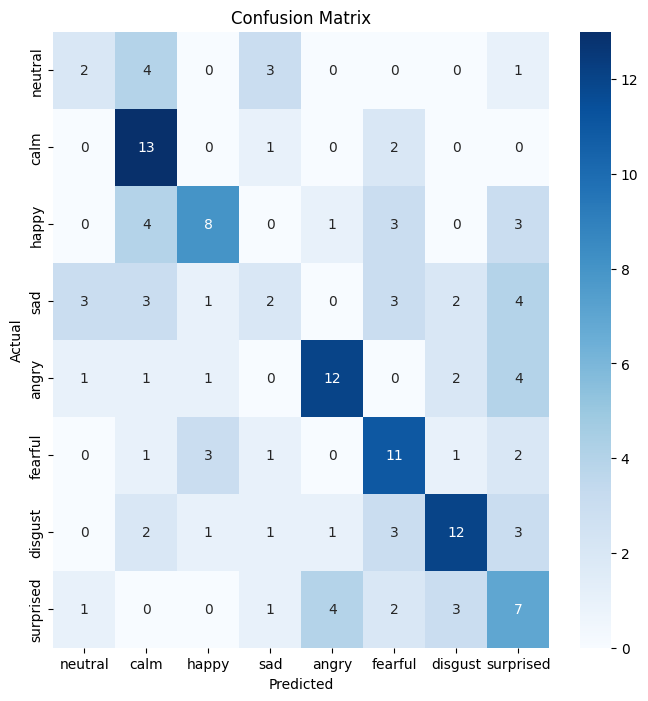

In [17]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping


import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

"""
dataset

"""

Crema = "/content/gdrive/MyDrive/23_T3/COMP9444/Assi2/project2/arka_new/"
# Crema = "/content/gdrive/MyDrive/23_T3/COMP9444/archive
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('-')
    emotion_code = part[2]
    if emotion_code == '01':
        file_emotion.append('neutral')
    elif emotion_code == '02':
        file_emotion.append('calm')
    elif emotion_code == '03':
        file_emotion.append('happy')
    elif emotion_code == '04':
        file_emotion.append('sad')
    elif emotion_code == '05':
        file_emotion.append('angry')
    elif emotion_code == '06':
        file_emotion.append('fearful')
    elif emotion_code == '07':
        file_emotion.append('disgust')
    elif emotion_code == '08':
        file_emotion.append('surprised')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

plt.title('Count of Emotions', size=16)
sns.countplot(Crema_df, x="Emotions")
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

"""
visualizatin
"""

def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()


emotion='angry'
path = np.array(Crema_df.Path[Crema_df.Emotions==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

"""
MCFF
"""
labels = {
    'neutral': 0,
    'calm': 1,
    'happy': 2,
    'sad': 3,
    'angry': 4,
    'fearful': 5,
    'disgust': 6,
    'surprised': 7
    }
Crema_df.replace({'Emotions':labels},inplace=True)

num_mfcc=13
n_fft=2048
hop_length=512
SAMPLE_RATE = 48000
data = {
        "labels": [],
        "mfcc": []
    }
for i in range(1440):
    data['labels'].append(Crema_df.iloc[i,0])
    signal, sample_rate = librosa.load(Crema_df.iloc[i,1], sr=SAMPLE_RATE)
    mfcc = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13, n_fft=2048, hop_length=512)
    mfcc = mfcc.T
    data["mfcc"].append(np.asarray(mfcc))
    if i%500==0:
        print(i)

"""
Padding MFCC to make equal length
"""
X = np.asarray(data['mfcc'])
y = np.asarray(data["labels"])

X = tf.keras.preprocessing.sequence.pad_sequences(X)
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

print(X_train.shape,y_train.shape,X_validation.shape,y_validation.shape,X_test.shape,y_test.shape)

def build_model(input_shape):
    model = tf.keras.Sequential()

    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(LSTM(64))

    model.add(Dense(32, activation='relu'))
    # model.add(Dropout(0.5))
    # model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='softmax'))

    return model


# create network
input_shape = (None,13)
model = build_model(input_shape)

# compile model
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=150, batch_size=32, callbacks=[early_stop])



test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: ",test_acc)

train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# loss line
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# accuracy line
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

model.save('Speech-Emotion-Recognition-Model.h5')

# Confusion Matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels.keys(), yticklabels=labels.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()